### Задача
Возьмите задачу с винами (https://www.kaggle.com/rajyellow46/wine-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.

# 1. Понимание бизнеса

## 1.1 Цель

Задача состоит в том, чтобы спрогнозировать качество красного вина по шкале 0-10.

## 1.2 Описание

Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о типах винограда, марке вина, цене продажи вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, существует гораздо больше нормальных вин, чем отличных или плохих). Для обнаружения нескольких превосходных или плохих вин можно было бы использовать более сложные алгоритмы обнаружения выбросов. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были случайным образом удалены.

[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Изучение данных

## 2.1 Импррт библиотек

In [62]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import pandas as pd 
import numpy as np 
from sklearn import metrics 

# Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling Helpers
from sklearn.model_selection import train_test_split 

# Modelling Algorithms
from sklearn.linear_model import LinearRegression 

## 2.3 Загрузка данных

In [63]:
df = pd.read_csv('winequalityN.csv')
df.shape

(6497, 13)

## 2.4 Статистика и визуализация

In [64]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


**Описание переменных**
- type - два вида вин, красное вино и белое вино
- fixed acidity - фиксированные кислоты
- volatile acidity - прочие кислоты
- Citric acid - Лимонная кислота
- Residual sugar - Остаточный сахар
- Chlorides - Хлориды
- Free sulfur dioxide - Свободный диоксид серы
- Total sulfur dioxide - Общий диоксид серы
- Density - Плотность
- pH - Потенциал водорода
- Sulphates - Сульфаты
- Alcohol - Алкоголь
- Quality - Качество

### 2.4.1 Изучим коррелицию между признаками

Учитывая набор значений признаков, мы должны спрогнозировать качество вина. Нахождим корреляцию каждого признака с нашей целевой переменной - quality

In [66]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.077031
volatile acidity       -0.265953
citric acid             0.085706
residual sugar         -0.036825
chlorides              -0.200886
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019366
sulphates               0.038729
alcohol                 0.444319
Name: quality, dtype: float64


Построим визуальную диаграмму корреляции

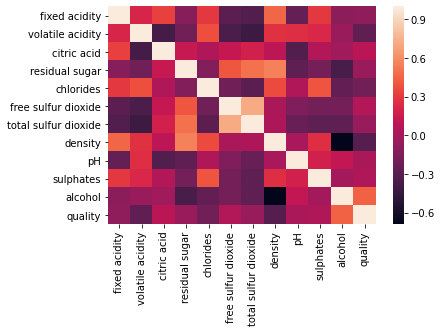

In [67]:
sns.heatmap(df.corr())
plt.show()

Оставим значения, корреляция которых превышает пороговое значение 0.05

In [68]:
df = df.drop('citric acid', axis=1)

# 3. Обработка данных

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

In [69]:
df.type = df.type.map({'white':0, 'red':1})

## 3.2 Очистка пропущенных значений

In [81]:
df.dropna(subset=['sulphates'], inplace=True)
df.dropna(subset=['pH'], inplace=True)
df.dropna(subset=['chlorides'], inplace=True)
df.dropna(subset=['residual sugar'], inplace=True)
df.dropna(subset=['residual sugar'], inplace=True)
df.dropna(subset=['volatile acidity'], inplace=True)
df.dropna(subset=['fixed acidity'], inplace=True)

## 3.3 Сборка финальных датасетов для моделирования

Создаем вектора x, содержащие входные объекты и содержащие переменную качества. y - целевая переменная.

In [83]:
x = df.drop('quality', axis=1)
y = df['quality']

### 3.1.1 Создание датасетов

Отделяем данные для обучения и для проверки

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Остановим свой выбор на линейной регрессия.

In [85]:
regressor = LinearRegression()

## 4.2 Обучение модели

In [86]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 5. Оценка
Теперь мы собираемся оценить модель

## 5.1 Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

In [87]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.02164184 6.7720276  5.4777415  ... 6.18143415 5.7220237  6.4429915 ]
[5.59976819 5.75903691 5.76293468 ... 6.44359395 5.33700296 6.10178845]


Вычисление среднеквадратичной ошибки корня для обучения, а также для тестового набора. RMSE для учебных и тестовых наборов должен быть очень похожим, если мы построили хорошую модель.

In [90]:
# Посчитаем RMSE
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.7285995453220119
0.7423190243171602
